In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt
#https://github.com/gkabbe/Python-Kurs2015/wiki/5---Numpy
#Berechnet den Massenmittelpunkt
#https://mubaris.com/posts/kmeans-clustering/
%matplotlib inline

class k_Means():
    """
        Erhaelt eine Punkt-Liste als Array
        die Anzahl der Clusterpunkte
        eventuell die Cluster-Liste, wenn nicht,
        werden die Cluster-Punkte zufaellig aus den
        Punkten der PL bestimmt
    """
    def __init__(self, punkte, anzahl, cetroiden=None):        
        #print(self.cetroiden)
        self.puLi = punkte
        self.anzahlCluster = anzahl
        self.laengePuLi, self.dimPunkte =self.puLi.shape
        if cetroiden:
            self.cetroiden=np.array(cetroiden)
        else:
            self.bestimmeCentroiden()
        print("StartCluster: \n", self.cetroiden)
        self.cluster= np.zeros((self.laengePuLi,),dtype=int)
        self.berechneFehler()
        self.error=20
        self.cls=[]#Liste der Cetroiden 
        c=np.copy(self.cetroiden)#als echte Kopie einfuegen
        self.cls.append(c)#das sind die ersten
        
        
    def bestimmeCentroiden(self):
        #zufaellige Auswahl der Clusterpunkte aus den gegebenen
        self.cetroiden=np.zeros((self.anzahlCluster,self.dimPunkte),dtype=int)
        cetroidenste=[]
        i=0
        while len(cetroidenste) < self.anzahlCluster:
            index= random.randint(0,self.laengePuLi-1)
            cl=self.puLi[index]
            if not self.istEnthalten(cetroidenste,cl): #vermeide Doppelte
                cetroidenste.append(cl)
                self.cetroiden[i]=self.puLi[index]
                i+=1
                
    def istEnthalten(self,array,el):
        for e in array:
            if (e==el).all():
                return True
        return False
        
    def einteilRunde(self):   
        """
        ordnet die Punkte den Centroiden zu
        """
        for i in range(self.laengePuLi):
            #print("Abstaende: ",self.puLi[i])
            abstand=np.linalg.norm(self.cetroiden-self.puLi[i],axis=1)
            #euklid. Abstand zur Centroide
            #print(abstand)
            self.cluster[i]=np.argmin(abstand) #Bestimme Index des Minimums
        print("ClusterListe: ",self.cluster)
        self.cetroiden_old=np.copy(self.cetroiden)        
        for i in range(self.anzahlCluster):            
            punkte= [self.puLi[j] for j in range(self.laengePuLi) if self.cluster[j]==i]                 
            self.cetroiden[i]=np.mean(punkte,axis =0)        
        print("Neue Cluster: \n", self.cetroiden)        
        c=np.copy(self.cetroiden)
        self.cls.append(c)        
        self.diff = np.linalg.norm(self.cetroiden-self.cetroiden_old)
        #Aenderung zur letzten Runde
        print("Differenz zur letzten Runde: ",self.diff)
        self.berechneFehler()
        self.zeigen()

    def berechneFehler(self):
        """
        bestimmt jeweils den euklidischen Abstand der Centroiden
        zu den einzelnen Clusterpunkten
        """
        error=0
        for i in range(self.anzahlCluster): 
            diff = np.array([self.puLi[j] -self.cetroiden[i] for j in range(self.laengePuLi) if self.cluster[j]==i])
            d= np.linalg.norm(diff)
            #print(diff,d)
            error+=d
        print("Fehler: ",error)


    
    def einteilen(self,bis=0): 
        """
        bis legt fest, wie groß der Abstand der Centroiden 
        zu denen der letzten Runde ist
        """
        self.zeigen()
        self.einteilRunde()
        while self.diff> bis:    
            self.einteilRunde()            
            
            
    def gibZahlen(self):
        print("Verteilung der Punkte auf die Cluster")
        #liefert die Anzahlen der Punkte je Cluster
        for i in range(self.anzahlCluster):            
            punkte= [self.puLi[j] for j in range(self.laengePuLi) if self.cluster[j]==i]
            print(i,len(punkte))

    def zeigeCentroiden(self):
        print("Centroiden")
        for c in self.cls:
            print(c)
            
    def zeigen(self):
        fig = plt.figure()
        fig.suptitle("Einteilung in Cluster")
        ax = fig.add_subplot(111)        
        farben=["red","yellow","blue","green","lightblue","grey"]*2
        m=["+","x","*","o","v"]*20
        for i in range(self.anzahlCluster):
            xs= [self.puLi[j][0] for j in range(self.laengePuLi) if self.cluster[j]==i]
            ys= [self.puLi[j][1] for j in range(self.laengePuLi) if self.cluster[j]==i]                      
            ax.scatter(xs,ys, c=farben[i])        
        si=0#Markerzaehler
        self.zeigeCentroiden()        
        for c in self.cls:            
            ax.scatter(c[0][0],c[0][1], c="black",marker=m[si],label=si)#damit das Label nur einmal kommt
            for i in range(1,self.anzahlCluster):
                ax.scatter(c[i][0],c[i][1], c="black",marker=m[si])#der Rest ohne Label
            si+=1

        maxis=np.amax(self.puLi,0)
        minis=np.amin(self.puLi,0)
        print("Maxis ",maxis, " Minis: ",minis)
        plt.axis([int(minis[0])-2,int(maxis[0])+2,
                  int(minis[1])-2,int(maxis[1])+2])
        plt.legend()
        plt.show()

StartCluster: 
 [[ 3  8]
 [ 3 11]
 [ 5  4]]
Fehler:  16.15549442140351
Centroiden
[[ 3  8]
 [ 3 11]
 [ 5  4]]
Maxis  [13 12]  Minis:  [2 3]


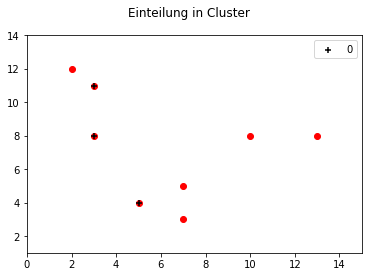

ClusterListe:  [1 1 0 2 2 2 2 2]
Neue Cluster: 
 [[ 3  8]
 [ 2 11]
 [ 8  5]]
Differenz zur letzten Runde:  3.3166247903554
Fehler:  9.351467495566867
Centroiden
[[ 3  8]
 [ 3 11]
 [ 5  4]]
[[ 3  8]
 [ 2 11]
 [ 8  5]]
Maxis  [13 12]  Minis:  [2 3]


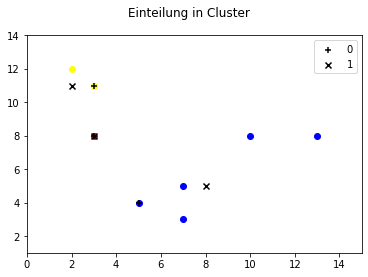

ClusterListe:  [1 1 0 2 2 2 2 2]
Neue Cluster: 
 [[ 3  8]
 [ 2 11]
 [ 8  5]]
Differenz zur letzten Runde:  0.0
Fehler:  9.351467495566867
Centroiden
[[ 3  8]
 [ 3 11]
 [ 5  4]]
[[ 3  8]
 [ 2 11]
 [ 8  5]]
[[ 3  8]
 [ 2 11]
 [ 8  5]]
Maxis  [13 12]  Minis:  [2 3]


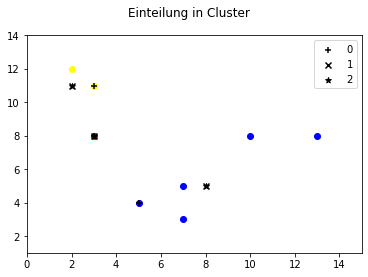

In [17]:
if __name__=="__main__":
    punktliste= [[2,12],[3,11],[3,8],[5,4],[7,5],[7,3],[10,8],[13,8]]
    puAr=np.array(punktliste,dtype=int)
    start= [[ 2 , 3], [ 8, 8], [ 9, 12]]
    #puAr=csv2array("xclara.csv")
    #print(puAr)
    k=k_Means(puAr,3)#listeClusterPunkte)
    k.einteilen()
    


ToDo: Bestimmung der Ellbogenkurve,um k festzulegen
<img src='ellbogenkurve.png'>
